In [117]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.utils import algorithm_globals

from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN

algorithm_globals.random_seed = 42

In [150]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

iris_data = load_iris()
features = iris_data.data
labels = iris_data.target

train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

# Scale the data
scaler = StandardScaler().fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

# One-hot encode the target values
#encoder = OneHotEncoder()
#features = encoder.fit_transform(features.reshape(-1, 1))
#train_features = encoder.fit_transform(train_features.reshape(-1, 1))
#train_labels = encoder.fit_transform(train_labels.reshape(-1, 1))

num_qubits = features.shape[1]
#print("num_qubits = ", num_qubits)

#num_qubits = 2

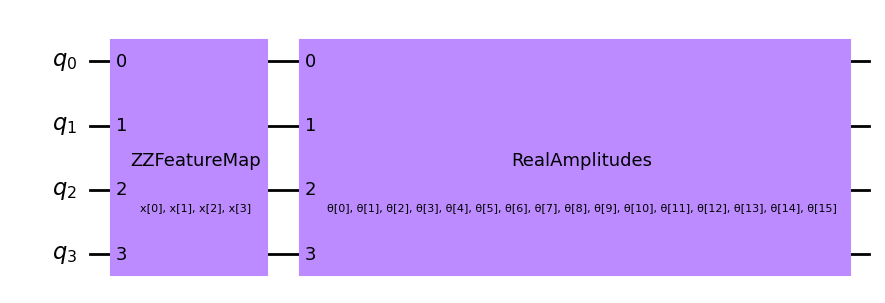

In [151]:
# construct QNN
qc = QuantumCircuit(num_qubits)
feature_map = ZZFeatureMap(num_qubits)
ansatz = RealAmplitudes(num_qubits)
qc.compose(feature_map, inplace=True)
qc.compose(ansatz, inplace=True)
qc.draw(output="mpl")

In [152]:
estimator_qnn = EstimatorQNN(
    circuit=qc, 
    input_params=feature_map.parameters, 
    weight_params=ansatz.parameters
)

# construct neural network classifier
classifier = NeuralNetworkClassifier(
    estimator_qnn,
    optimizer=COBYLA(maxiter=60),
    one_hot=False
)

In [153]:
classifier.fit(train_features, train_labels)

Traceback (most recent call last):
  Cell In[153], line 1
    classifier.fit(train_features, train_labels)
  File /opt/conda/lib/python3.10/site-packages/qiskit_machine_learning/algorithms/trainable_model.py:201 in fit
    self._fit_result = self._fit_internal(X, y)
  File /opt/conda/lib/python3.10/site-packages/qiskit_machine_learning/algorithms/classifiers/neural_network_classifier.py:111 in _fit_internal
    return self._minimize(X, y)
  File /opt/conda/lib/python3.10/site-packages/qiskit_machine_learning/algorithms/classifiers/neural_network_classifier.py:117 in _minimize
    self._validate_binary_targets(y)
  File /opt/conda/lib/python3.10/site-packages/qiskit_machine_learning/algorithms/classifiers/neural_network_classifier.py:227 in _validate_binary_targets
    raise QiskitMachineLearningError(
QiskitMachineLearningError: 'The target values appear to be multi-classified. The neural network output shape is only suitable for binary classification.'

Use %tb to get the full traceba